<a href="https://colab.research.google.com/github/ben3amer/Machine_Learning/blob/main/TP2_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#1- Créer Un DataFrame en utilisant les données de fichier ‘’Iris.csv” qui contient notre dataSet.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.wrappers.scikit_learn import  KerasClassifier
from keras.utils import np_utils
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")
url='https://drive.google.com/file/d/1lCrldn-uT1K6ctUC2xt7-hMjbMZ9Ft9r/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url,index_col='Id')


In [ ]:
#2-Afficher les 10 premières lignes du DataFrame.
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa


In [ ]:
#3-Afficher les dimensions du dataframe.
df.shape

(150, 5)

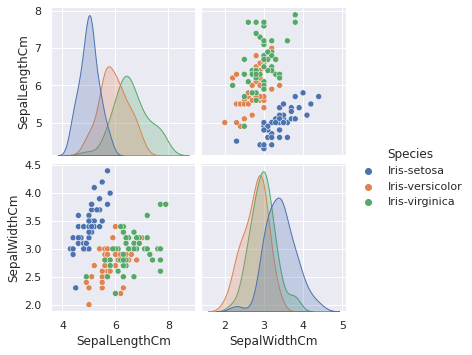

In [ ]:
#4-Utiliser la bibliothèque python Seaborn pour visualiser les données en fonction de la longueur des pétales et de largeur des sépales.
# Import seaborn
import seaborn as sns
sns.set_theme()
sns.pairplot(
    data=df, vars=("SepalLengthCm","SepalWidthCm") , hue="Species"
)

In [ ]:
#5-Ecrire un script python permettant de labelliser les différentes espèces d’iris.
for i in range(len(df.axes[0])):
  for j in range(len(df.axes[1])):
    if df.iloc[i,j]=="Iris-setosa":
      df.iloc[i,j]=0
    elif df.iloc[i,j]=="Iris-virginica":
      df.iloc[i,j]=1
    elif df.iloc[i,j]=="Iris-versicolor":
      df.iloc[i,j]=2

In [ ]:
#6-Afficher du nouveau les 10 premières lignes du nouveau DataFrame contenant les labels.
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0
6,5.4,3.9,1.7,0.4,0
7,4.6,3.4,1.4,0.3,0
8,5.0,3.4,1.5,0.2,0
9,4.4,2.9,1.4,0.2,0


In [ ]:
#7-Écrire un script python permettant la division de dataset en des données d’apprentissage (70%) et des données de test (30%).
X=df.iloc[:,:-1]
Y=df.iloc[:,-1:]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1, train_size = .70)

In [ ]:
#8-Afficher les 10 premières données d’apprentissage et celles de test.
X_train[:10]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
119,7.7,2.6,6.9,2.3
19,5.7,3.8,1.7,0.3
5,5.0,3.6,1.4,0.2
46,4.8,3.0,1.4,0.3
60,5.2,2.7,3.9,1.4
40,5.1,3.4,1.5,0.2
37,5.5,3.5,1.3,0.2
118,7.7,3.8,6.7,2.2
140,6.9,3.1,5.4,2.1


In [ ]:
X_test[:10]   

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
15,5.8,4.0,1.2,0.2
99,5.1,2.5,3.0,1.1
76,6.6,3.0,4.4,1.4
17,5.4,3.9,1.3,0.4
132,7.9,3.8,6.4,2.0
57,6.3,3.3,4.7,1.6
142,6.9,3.1,5.1,2.3
45,5.1,3.8,1.9,0.4
30,4.7,3.2,1.6,0.2


In [ ]:
#9-Ecrire un script python qui utilise un perceptron multicouche pour l’apprentissage des données avec un optimisateur (‘lbfgs’, epsilon=0.07 et nombre maximum d’itération=150)

from sklearn.neural_network import MLPClassifier
TrainModel=MLPClassifier(hidden_layer_sizes=(len(X_train.columns),),solver="lbfgs",epsilon=0.07,max_iter=150).fit(X_train.astype('int'), Y_train.astype('int'))
predModel=TrainModel.predict(X_test.astype('int'))
predModel

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 2, 2, 0, 1, 2, 1, 0, 0, 1, 2, 0, 1, 2, 2, 0, 2, 2, 0, 0, 2, 2,
       1, 0, 1, 2, 0, 0, 2, 1, 2, 1, 2, 1, 1, 0, 2, 0, 2, 1, 1, 0, 1, 1,
       2])

In [ ]:

#10-Evaluer ce perceptron en affichant son “accuracy” et le temps de réponse.
from sklearn import metrics 
metrics.accuracy_score(Y_test.astype('int'),predModel)

0.9777777777777777

In [ ]:
#11-Afficher la matrice de confusion associée à notre cas.
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
metrics.confusion_matrix(Y_test.astype('int'),predModel)

array([[14,  0,  0],
       [ 0, 13,  0],
       [ 0,  1, 17]])

12-Selon les résultats affichés commenter le perceptron que vous avez utilisé.

L'axe des x présente les valeurs prédite et des Y présente les valeurs réelles. Les valeurs (pour les X et les Y ) sont ordonnées respectivement : Setosa,Versicolor et Virginica. D'après la matrice de confusion => 14 valeurs classées comme Setosa sont en réalité Virginica, et 13 comme Virginica mais elles sont Setosa et les 18 autres sont bien classées .

In [ ]:
#13-On va ajouter le paramètre de taux d’apprentissage au niveau de classifieur utilisé pour une valeur égale 0.7
TrainModel=MLPClassifier(hidden_layer_sizes=(len(X_train.columns),),solver="lbfgs",epsilon=0.07,max_iter=150,learning_rate_init=0.7).fit(X_train.astype('int'), Y_train.astype('int'))
predModel=TrainModel.predict(X_test.astype('int'))
predModel
     

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1])

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when 

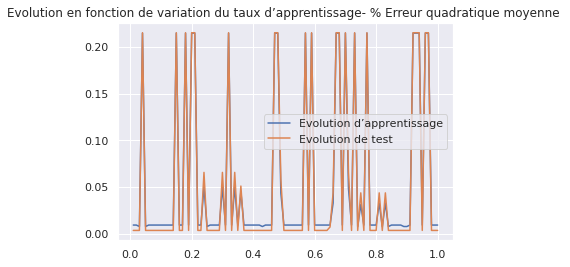

In [ ]:
#14-Nous allons étudier la variation du paramètre de taux d’apprentissage, donc nous allons afficher la courbe d'évolution d’apprentissage et celle de test en fonction de variation du taux d’apprentissage.
loss_values=[]
listLR=[]
Trainloss_values=[]
for lR in range(1,101):
  TrainModel=MLPClassifier(hidden_layer_sizes=(len(X_train.columns),),solver="lbfgs",epsilon=0.07,max_iter=150,learning_rate_init=lR/100).fit(X_train.astype('int'), Y_train.astype('int'))
  #évolution d’apprentissage
  TrainpredModel=TrainModel.predict(X_train.astype('int'))
  Trainloss_values.append(metrics.mean_squared_log_error(Y_train.astype('int'),TrainpredModel))
  #évolution de test
  predModel=TrainModel.predict(X_test.astype('int'))
  loss_values.append(metrics.mean_squared_log_error(Y_test.astype('int'),predModel))
  listLR.append(lR/100)
plt.plot(listLR,Trainloss_values,label="Evolution d’apprentissage")
plt.plot(listLR,loss_values,label="Evolution de test")
plt.legend()
plt.title('Evolution en fonction de variation du taux d’apprentissage- % Erreur quadratique moyenne ')
plt.show()

In [ ]:
#15-Nous allons fixer un nombre d’itération égale à 10 fois le nombre fixé au début. Quel est le phénomène constaté ? et comment pouvons- nous surmonter celui-ci ?
TrainModel=MLPClassifier(hidden_layer_sizes=(len(X_train.columns),),solver="lbfgs",epsilon=0.07,max_iter=1500).fit(X_train.astype('int'), Y_train.astype('int'))
#fit model on the train dataset
TrainpredModel=TrainModel.predict(X_train.astype('int'))
metrics.accuracy_score(Y_train.astype('int'),TrainpredModel)


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6952380952380952

In [ ]:

#evaluate on the test dataset
predModel=TrainModel.predict(X_test.astype('int'))
metrics.accuracy_score(Y_test.astype('int'),predModel)

0.6

In [ ]:

#16-Tester d’autres classifieurs de type réseau de neurones (Dynamique/Récurrent et Non récurrent) .
from keras.models import Sequential
from keras.layers import Dense,LSTM,SimpleRNN
Seqmodel = Sequential()
Seqmodel.add(Dense(len(X_train.columns),input_shape=(len(X_train.columns),),activation='relu'))
Seqmodel.add(Dense(1,activation='softmax'))
Seqmodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model = Seqmodel.fit(X_train.astype('int'), Y_train.astype('int'))

4/4 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - acc: 0.3524


In [ ]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,SimpleRNN
model = SimpleRNN(len(X_train.columns),return_sequences=True, return_state=True)
model=Sequential()
model.add(Dense(len(X_train.columns),input_shape=(len(X_train.columns),),activation='relu'))
model.add(Dense(1,activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train.astype('float'), Y_train.astype('float'))

4/4 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - acc: 0.3524
